# Final_Model

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")

In [ ]:
results = model.train(data="./yolov8/data.yaml", epochs=100, save=True)

In [ ]:
from ultralytics import YOLO
model = YOLO("./best.pt")
validation_results = model.val(data="./resume-parser.v1i.yolov8/data.yaml",
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6)


In [1]:
from ultralytics import YOLO
model = YOLO("./best (3).pt")
validation_results = model.val(data="./yolov8/data.yaml",
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6)


Ultralytics YOLOv8.1.20 🚀 Python-3.10.9 torch-2.1.2+cu121 CPU (AMD Ryzen 5 4600H with Radeon Graphics)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /home/amine/resume_rec_system/text_segmentation/yolov8/test/labels.cache... 167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 167/167 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/11 [00:00<?, ?it/s]

nc 11


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [02:51<00:00, 15.57s/it]


                   all        167       1244      0.935      0.878      0.938        0.9
        Certifications        167         35      0.946      0.743      0.875      0.866
             Community        167         17       0.77      0.824      0.869      0.825
               Contact        167        174      0.958       0.91      0.953      0.908
             Education        167        152      0.959       0.93      0.961       0.94
            Experience        167        163      0.979       0.92      0.971      0.965
             Interests        167         55      0.995      0.855      0.931      0.864
             Languages        167         79       0.97      0.861      0.924      0.894
                  Name        167        165      0.975      0.933       0.96      0.882
                Profil        167        222      0.956      0.883      0.956      0.889
              Projects        167         16       0.83      0.938      0.979      0.976
                skill

In [ ]:
print(validation_results)

In [ ]:
from ultralytics import YOLO
import cv2
from shapely.geometry import box

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

frame = cv2.imread("../output_image_0.png")
model = YOLO("./best.pt")

threshold = 0

results = model(frame)[0]
print(results)
processed_results = []
seen_regions = set()

for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
    x1, y1, x2, y2, score, class_id = result
    region_key = (x1, y1, x2, y2)
    
    if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
        seen_regions.add(region_key)
        processed_results.append(result)
for result in processed_results:
    x1, y1, x2, y2, score, class_id = result
    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
    cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

cv2.imwrite("output_image_path.jpg", frame)


# Easyocr

In [3]:
allowed_chars = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,;:()'-\"é@_àçàâäéèêëîïôöùûüÿç ")
for char in allowed_chars:
    print(char)

_
L
y
E
P
V
C
5
O
n
k
7
q
8
e
1
g
M
X
4
z
T
D
:
r
x
6
(
o
2
3
H
S
w
A
B
I
,
-
h
é
l
a
b
p
c
N
Y
i
;
Z
.
 
m
W
9
R
)
'
d
u
@
s
U
t
v
Q
0
j
G
J
K
"
F
f


In [1]:
import cv2
from ultralytics import YOLO
import pytesseract

model = YOLO("./best (3).pt")
frame = cv2.imread("/home/amine/resume_rec_system/text_segmentation/test/resume_1.jpg")
threshold = 0.3
results = model(frame)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > threshold:
        cropped_region = frame[int(y1):int(y2), int(x1):int(x2)]
        results = pytesseract.image_to_string(cropped_region)
        print("extracted text:")
        for text in results:
            print(f"{text[0]}", end=' ')
        print()
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)

cv2.imwrite("output_image_path.jpg", frame)


0: 640x480 1 Contact, 1 Education, 1 Experience, 1 Languages, 1 Name, 2 Profils, 1 skills, 651.3ms
Speed: 16.9ms preprocess, 651.3ms inference, 19.1ms postprocess per image at shape (1, 3, 640, 480)
extracted text:


IndexError: string index out of range

In [ ]:
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > threshold:
        cropped_region = frame[int(y1):int(y2), int(x1):int(x2)]
        results = reader.readtext(cropped_region)
        print("extracted text:")
        for text in results:
            print(f"{text[1]}", end=' ')
        print()


# Tesseract

In [ ]:
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

In [5]:
import cv2
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("./best (3).pt")
frame = cv2.imread("./nlp_dataset_cleaned/images_enhanced/cv142_jpg.rf.bbcb7d8338d9b62b08fe3b4fa89827e2.jpg")
threshold = 0
results = model(frame)[0]
text = ""
print(results.boxes)
for result in results.boxes.xyxy.tolist():
    x1, y1, x2, y2 = result
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cropped_region = frame[y1:y2, x1:x2]
    text_box = pytesseract.image_to_data(cropped_region, lang="fra")
    text+=text_box
    plt.imshow(cropped_region)
    print(f"Extracted Text: {text}")


0: 640x640 1 Contact, 1 Experience, 1 Name, 1 Profil, 249.5ms
Speed: 5.1ms preprocess, 249.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4., 2., 8., 7.])
conf: tensor([0.9717, 0.9617, 0.9393, 0.9198])
data: tensor([[2.9154e+02, 6.7055e+02, 2.2551e+03, 2.2638e+03, 9.7171e-01, 4.0000e+00],
        [2.9652e+02, 2.3873e+02, 1.0528e+03, 4.2209e+02, 9.6171e-01, 2.0000e+00],
        [2.9505e+02, 5.1227e+02, 2.2159e+03, 6.4196e+02, 9.3931e-01, 8.0000e+00],
        [3.0242e+02, 1.9558e+02, 7.1938e+02, 2.3916e+02, 9.1978e-01, 7.0000e+00]])
id: None
is_track: False
orig_shape: (2560, 2560)
shape: torch.Size([4, 6])
xywh: tensor([[1273.2969, 1467.1942, 1963.5195, 1593.2864],
        [ 674.6489,  330.4060,  756.2590,  183.3584],
        [1255.5011,  577.1112, 1920.8943,  129.6899],
        [ 510.9014,  217.3723,  416.9604,   43.5765]])
xywhn: tensor([[0.4974, 0.5731, 0.7670, 0.6224],
        [0.2635, 0.12


0: 640x640 1 Contact, 1 Education, 1 Experience, 1 Languages, 2 Profils, 2 skillss, 130.5ms
Speed: 2.8ms preprocess, 130.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Extracted Text: Ex_poﬂonco

 

Web Developer - 09/20I5 to 05/2019
Luna Web Design, New York

e  Cooperate with designers to creste clean interfaces and
simple, Intuitive interactions and experiences.

«  Develop project concepts and maintain optimal workfiow.

«  Work with senior developer to manage large, complex
design projects for corporate clients.

»  Complete detalled programming and development tasks
for front end public and internal websites as well as
chalienging back-end server code.

e  Carry out quality assurance tests to discover errors and
optimizre usability.
mt ENGRTi QE

e  Project management =  Creative design
«  Strong decision maker «  Iinnovative
»  Complex problem soiver *  Service-focused

 
8umm.rg

Senior Wetb Devæeloper speclalizing in front end development.
Experienced 

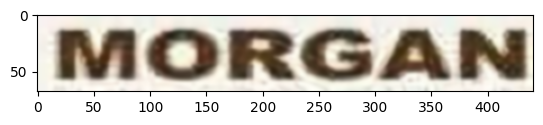

In [8]:
import cv2
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("./best (3).pt")
frame = cv2.imread("./nlp_dataset_cleaned/images_enhanced/125_jpeg_jpg.rf.6726364e6aa86ffb9815ebcf832fc4c8.jpg")
threshold = 0
results = model(frame)[0]
text = ""
for result in results.boxes.xyxy.tolist():
    x1, y1, x2, y2 = result
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cropped_region = frame[y1:y2, x1:x2]
    noise_canceling = cv2.GaussianBlur(cropped_region, (7, 7), 1.5)
    erode_dilation = cv2.morphologyEx(noise_canceling, cv2.MORPH_OPEN, (5, 5))
    text_box = pytesseract.image_to_string(erode_dilation, lang="fra")
    plt.imshow(noise_canceling)
    text+=text_box
print(f"Extracted Text: {text}")


0: 640x640 1 Contact, 1 Education, 3 Experiences, 1 Name, 2 Profils, 1 skills, 185.8ms
Speed: 2.6ms preprocess, 185.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Extracted Text: es

meo/saasaure
mAJEM/ PI D

Expérience

Srgarrses Canseit - Senpgiaire

Stage PIFF pour l'obtenNtVIOoAs du diplôme en
Licence Appliquée cn Infeasrmatique décisonnetie
au se de l'entreprise SVigrne Consest

Mise en placëe d'un modèéle de prédiction

# Churns » dane e domaine de
télécormmuni<atien cA VUisant des algocithmes
de Datas MAinving (Classitfication, arbre de
déciaion), des aigorithmnes de Machine Legarnine
(Random loreost, Méar‘ossion Logistique) et
lélabboration d'un tabieau de bôord % l'aide de
l'œautil Sde Vsuvalisation des données Tablenu.

 

 

 
Résumé

Actueollerment, |e t‘uis vune étudiante en 26me
année mastéère profestionnel en Oata “ciente. 1e
cherche us stoge de durée 6 moIs doms le
demainbe 38e Business Intelligence pour réaliser
mron MNémoire Aans une cAtrOprise

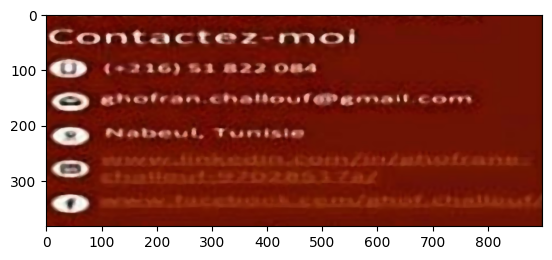

In [7]:
import cv2
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("./best (3).pt")
frame = cv2.imread("./nlp_dataset_cleaned/images_enhanced/132834697_1786356748212247_6007271417712918649_n_jpg.rf.5c5a744420a7827db3672e9b3ae63ca6.jpg")
threshold = 0   
results = model(frame)[0]
text = ""
for result in results.boxes.xyxy.tolist():
    x1, y1, x2, y2 = result
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cropped_region = frame[y1:y2, x1:x2]
    noise_canceling = cv2.medianBlur(cropped_region, 7)
    text_box = pytesseract.image_to_string(noise_canceling, lang="fra")
    plt.imshow(noise_canceling)
    text+=text_box
print(f"Extracted Text: {text}")

In [3]:
import cv2
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

def evaluate_text(extracted_text):
    words = extracted_text.split()
    num_words = len(words)
    blob = TextBlob(extracted_text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    incorrect_words = sum(1 for word in blob.words if not word.spellcheck()[0][1] == 1.0)
    return num_words, incorrect_words
model = YOLO("./best (3).pt")
frame = cv2.imread("./nlp_dataset_cleaned/images_enhanced/132834697_1786356748212247_6007271417712918649_n_jpg.rf.5c5a744420a7827db3672e9b3ae63ca6.jpg")
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
sigma_values = [0.5, 1, 1.5, 2]
best_params = None
best_evaluation = (0, float('inf'))
results = model(frame)[0]
for ksize in kernel_sizes:
    for sigma in sigma_values:
        text = ""
        for result in results.boxes.xyxy.tolist():
            x1, y1, x2, y2 = result
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cropped_region = frame[y1:y2, x1:x2]
            noise_canceling = cv2.GaussianBlur(cropped_region, ksize, sigma)
            text_box = pytesseract.image_to_string(noise_canceling, lang="fra")
            text += text_box
        num_words, incorrect_words = evaluate_text(text)
        evaluation = (num_words, incorrect_words)
        if evaluation[1] < best_evaluation[1] or (evaluation[1] == best_evaluation[1] and evaluation[0] > best_evaluation[0]):
            best_evaluation = evaluation
            best_params = (ksize, sigma)
        print(f"Kernel Size: {ksize}, Sigma: {sigma}, Number of Words: {num_words}, Incorrect Words: {incorrect_words}")

print(f"Best Parameters: Kernel Size: {best_params[0]}, Sigma: {best_params[1]}")
print(f"Best Evaluation: Number of Words: {best_evaluation[0]}, Incorrect Words: {best_evaluation[1]}")



0: 640x640 1 Contact, 1 Education, 3 Experiences, 1 Name, 2 Profils, 1 skills, 324.1ms
Speed: 13.3ms preprocess, 324.1ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)
Kernel Size: (3, 3), Sigma: 0.5, Number of Words: 474, Incorrect Words: 291
Kernel Size: (3, 3), Sigma: 1, Number of Words: 430, Incorrect Words: 265
Kernel Size: (3, 3), Sigma: 1.5, Number of Words: 414, Incorrect Words: 259
Kernel Size: (3, 3), Sigma: 2, Number of Words: 403, Incorrect Words: 245
Kernel Size: (5, 5), Sigma: 0.5, Number of Words: 474, Incorrect Words: 291
Kernel Size: (5, 5), Sigma: 1, Number of Words: 395, Incorrect Words: 244
Kernel Size: (5, 5), Sigma: 1.5, Number of Words: 415, Incorrect Words: 234
Kernel Size: (5, 5), Sigma: 2, Number of Words: 390, Incorrect Words: 223
Kernel Size: (7, 7), Sigma: 0.5, Number of Words: 474, Incorrect Words: 291
Kernel Size: (7, 7), Sigma: 1, Number of Words: 391, Incorrect Words: 242
Kernel Size: (7, 7), Sigma: 1.5, Number of Words: 400, Incorre

# PaddlePaddle

In [ ]:
import cv2
from ultralytics import YOLO
from paddleocr import PaddleOCR

model = YOLO("./best (3).pt")
ocr = PaddleOCR(use_angle_cls=True, lang='fr')
frame = cv2.imread("./nlp_dataset_cleaned/images_enhanced/cv142_jpg.rf.bbcb7d8338d9b62b08fe3b4fa89827e2.jpg")
threshold = 0.3
results = model(frame)[0]
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > threshold:
        cropped_region = frame[int(y1):int(y2), int(x1):int(x2)]
        result = ocr.ocr(cropped_region, cls=True)
        for line in result:
            print(line)
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
cv2.imwrite("output_image_path.jpg", frame)

# Testing my choosen model

In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./AdamW.pt")
reader = easyocr.Reader(['fr'])
threshold = 0.3
similarity_overall = 0
for i in range(1, 11):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)        
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = reader.readtext(cropped_region)
        for text in extracted_text:
            code_text += f"{text[1]}"
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 10
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]

def compute_similarity(input_string, reference_string):
    distance = levenshtein_distance(input_string, reference_string)
    max_length = max(len(input_string), len(reference_string))
    similarity = 1 - (distance / max_length)
    return similarity * 100

model = YOLO("./best.pt")
reader = easyocr.Reader(['fr', 'en'])
threshold = 0.3
similarity_overall = 0

for i in range(1, 11):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = reader.readtext(cropped_region)
        for text in extracted_text:
            code_text += f"{text[1]}"
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = compute_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 10
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (5).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
with open("text.txt", "w") as f:
    f.write(code_text)
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (4).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region, config='--psm 6')
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region, config='--psm 6')
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (2).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import easyocr
import fitz
import pytesseract

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]
def compute_similarity(input_string, reference_string):
    distance = levenshtein_distance(input_string, reference_string)
    max_length = max(len(input_string), len(reference_string))
    similarity = 1 - (distance / max_length)
    return similarity * 100

model = YOLO("./best.pt")
reader = easyocr.Reader(['fr'])
threshold = 0.3
similarity_overall = 0
for i in range(1, 11):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()

    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region, config='--psm 6')
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = compute_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage

similarity_overall /= 10
print(similarity_overall)


# Testing_CER_WER

In [ ]:
#CER
import cv2
from ultralytics import YOLO
import easyocr
import fitz
import pytesseract

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]
def compute_similarity(input_string, reference_string):
    distance = levenshtein_distance(input_string, reference_string)
    max_length = max(len(input_string), len(reference_string))
    cer = distance / max_length
    return cer * 100

model = YOLO("./best (3).pt")
threshold = 0.3
cer_overall = 0
for i in range(1, 20):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()

    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = compute_similarity(code_text, pymupdf_text)
    cer_overall += similarity_percentage

cer_overall /= 20
print(cer_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
import pytesseract

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]

def compute_wer(reference, hypothesis):
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()
    distance = levenshtein_distance(reference_words, hypothesis_words)
    print(distance)
    if len(reference_words) != 0:
        wer = distance / len(reference_words)
    else:
        wer = 1
    return wer * 100

model = YOLO("./best (3).pt")
threshold = 0.3
wer_overall = 0

for i in range(1, 20):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()

    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    wer_percentage = compute_wer(pymupdf_text, code_text)
    wer_overall += wer_percentage

wer_overall /= 20
print(wer_overall)


In [ ]:
#OCR only code

import cv2
import fitz
import pytesseract

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]

def compute_wer(reference, hypothesis):
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()
    distance = levenshtein_distance(reference_words, hypothesis_words)
    if len(reference_words) != 0:
        wer = distance / len(reference_words)
    else:
        wer = 1
    return wer * 100

wer_overall = 0

for i in range(1, 20):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    image = cv2.imread(image_path)
    extracted_text = pytesseract.image_to_string(image)
    code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    wer_percentage = compute_wer(pymupdf_text, code_text)
    wer_overall += wer_percentage

wer_overall /= 20
print(wer_overall)


# Testing TF-IDF with cosine sim

In [1]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage
def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)
model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0
for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2= result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        noise_canceling = cv2.GaussianBlur(cropped_region, (5, 5), 1, 1)
        extracted_text = pytesseract.image_to_string(noise_canceling)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    similarity_percentage = calculate_text_similarity(code_text, pymupdf_text)
    similarity_overall += similarity_percentage
similarity_overall /= 20
print(similarity_overall)


0: 640x480 1 Contact, 1 Education, 1 Experience, 1 Languages, 1 Name, 2 Profils, 1 skills, 610.1ms
Speed: 8.5ms preprocess, 610.1ms inference, 13.1ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Certifications, 1 Community, 2 Educations, 1 Experience, 1 Languages, 1 Name, 1 Profil, 429.0ms
Speed: 5.3ms preprocess, 429.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Contact, 1 Education, 1 Experience, 2 Names, 2 Profils, 385.0ms
Speed: 3.6ms preprocess, 385.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

0: 640x512 1 Contact, 1 Languages, 2 Profils, 1 skills, 383.7ms
Speed: 6.6ms preprocess, 383.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)

0: 640x480 1 Community, 1 Contact, 1 Education, 1 Experience, 1 Interests, 2 Languagess, 1 Name, 2 Profils, 2 skillss, 273.3ms
Speed: 4.3ms preprocess, 273.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 Contact, 2 Exp

In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from shapely.geometry import box
import pytesseract
import re
import nltk
from spellchecker import SpellChecker

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
spell_en = SpellChecker(language='en')
spell_fr = SpellChecker(language='fr')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def correct_and_check_spelling(text, lang):
    words = text.split()
    corrected_words = []
    if lang == 'fr':
        for word in words:
            corrected_word = spell_fr.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    elif lang == 'en':
        for word in words:
            corrected_word = spell_en.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    return ' '.join(corrected_words)

def levenshtein_distance(s, t):
    m, n = len(s), len(t)
    if m < n:
        s, t = t, s
        m, n = n, m
    d = [list(range(n + 1))] + [[i] + [0] * n for i in range(1, m + 1)]
    for j in range(1, n + 1):
        for i in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                d[i][j] = min(d[i - 1][j], d[i][j - 1], d[i - 1][j - 1]) + 1
    return d[m][n]

def compute_wer(reference, hypothesis):
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()
    distance = levenshtein_distance(reference_words, hypothesis_words)
    if len(reference_words) != 0:
        wer = distance / len(reference_words)
    else:
        wer = 1
    return wer * 100

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
wer_overall = 0

for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()

    for result in sorted(results.boxes.data.tolist(), key=lambda x: x[4], reverse=True):
        x1, y1, x2, y2, score, class_id = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions) and score > threshold:
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2, score, class_id = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    code_text_cleaned = clean_text(code_text)
    pymupdf_text_cleaned = clean_text(pymupdf_text)
    code_text_corrected = correct_and_check_spelling(code_text_cleaned, 'en')
    wer_percentage = compute_wer(pymupdf_text_cleaned, code_text_corrected)
    wer_overall += wer_percentage

wer_overall /= 20
print("WER:", wer_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract
import nltk
from spellchecker import SpellChecker
from textblob import TextBlob
import re

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
spell_en = SpellChecker(language='en')
spell_fr = SpellChecker(language='fr')
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def correct_and_check_spelling(text, lang):
    words = text.split()
    corrected_words = []
    if lang == 'fr':
        for word in words:
            corrected_word = spell_fr.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    elif lang == 'en':
        for word in words:
            corrected_word = spell_en.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    return ' '.join(corrected_words)

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0

for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()

    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        grayscale_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
        extracted_text = pytesseract.image_to_string(grayscale_cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    code_text_cleaned = clean_text(code_text)
    pymupdf_text_cleaned = clean_text(pymupdf_text)    
    code_text_corrected = correct_and_check_spelling(code_text_cleaned, 'en')
    similarity_percentage = calculate_text_similarity(code_text_corrected, pymupdf_text_cleaned)
    similarity_overall += similarity_percentage

similarity_overall /= 20
print("Average similarity:", similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract
from transformers import pipeline
import re

fix_spelling_pipeline = pipeline("text2text-generation", model="oliverguhr/spelling-correction-multilingual-base")
def fix_spelling(text, max_length=512):
    corrected_text = fix_spelling_pipeline("fix:" + text, max_length=max_length)[0]['generated_text']
    return corrected_text

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0

for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        grayscale_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
        extracted_text = pytesseract.image_to_string(grayscale_cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    code_text_cleaned = clean_text(code_text)   
    code_text_corrected = fix_spelling(code_text_cleaned)
    similarity_percentage = calculate_text_similarity(code_text_corrected, pymupdf_text)
    similarity_overall += similarity_percentage

similarity_overall /= 20
print("Average similarity:", similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract
import nltk
from spellchecker import SpellChecker
from textblob import TextBlob
import re

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
spell_en = SpellChecker(language='en')
spell_fr = SpellChecker(language='fr')
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def correct_and_check_spelling(text, lang):
    words = text.split()
    corrected_words = []
    if lang == 'fr':
        for word in words:
            corrected_word = spell_fr.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    elif lang == 'en':
        for word in words:
            corrected_word = spell_en.correction(word)
            corrected_words.append(corrected_word if corrected_word else word)
    return ' '.join(corrected_words)

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0

for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        grayscale_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
        extracted_text = pytesseract.image_to_string(grayscale_cropped_region)
        code_text += extracted_text
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    code_text_cleaned = clean_text(code_text)
    pymupdf_text_cleaned = clean_text(pymupdf_text)    
    code_text_corrected = correct_and_check_spelling(code_text_cleaned, 'en')
    pymupdf_text_corrected = correct_and_check_spelling(pymupdf_text_cleaned, 'en')
    similarity_percentage = calculate_text_similarity(code_text_corrected, pymupdf_text_corrected)
    similarity_overall += similarity_percentage

similarity_overall /= 20
print("Average similarity:", similarity_overall)


In [ ]:
import cv2
from ultralytics import YOLO
import fitz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract
from transformers import pipeline
import re

fix_spelling_pipeline = pipeline("text2text-generation", model="oliverguhr/spelling-correction-multilingual-base")
def fix_spelling(text, max_length=256):
    corrected_text = fix_spelling_pipeline("fix:" + text, max_length=max_length)[0]['generated_text']
    return corrected_text

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0

for i in range(1, 21):
    pdf_path = f"./test/resume_{i}.pdf"
    image_path = f"./test/resume_{i}.jpg"
    pdf_document = fitz.open(pdf_path)
    code_text = ""
    pymupdf_text = ""
    page = pdf_document[0]
    image = cv2.imread(image_path)
    results = model(image)[0]
    processed_results = []
    seen_regions = set()
    
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)
    
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        grayscale_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
        extracted_text = pytesseract.image_to_string(grayscale_cropped_region)
        code_text += extracted_text
    
    pdf_page = pdf_document[0]
    text_page = pdf_page.get_text("text")
    pymupdf_text += text_page
    pdf_document.close()
    code_text_cleaned = clean_text(code_text)
    pymupdf_text_cleaned = clean_text(pymupdf_text)
    
    code_text_corrected = fix_spelling(code_text_cleaned)
    pymupdf_text_corrected = fix_spelling(pymupdf_text_cleaned)
    
    similarity_percentage = calculate_text_similarity(code_text_corrected, pymupdf_text_corrected)
    similarity_overall += similarity_percentage

similarity_overall /= 20
print("Average similarity:", similarity_overall)


In [ ]:
import matplotlib.pyplot as plt
grayscale_cropped_region = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_cropped_region)

In [ ]:
import cv2
from ultralytics import YOLO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from shapely.geometry import box
import pytesseract

def calculate_text_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    similarity_percentage = cosine_similarity(vectors)[0, 1] * 100
    return similarity_percentage

def overlap_ratio(box1, box2):
    rect1 = box(*box1)
    rect2 = box(*box2)
    intersection = rect1.intersection(rect2)
    area_intersection = intersection.area
    area_box1 = rect1.area
    area_box2 = rect2.area
    overlap_ratio1 = area_intersection / area_box1
    overlap_ratio2 = area_intersection / area_box2
    return max(overlap_ratio1, overlap_ratio2)

model = YOLO("./best (3).pt")
threshold = 0.3
similarity_overall = 0

for i in range(1, 5):
    image_path = f"./test/resume_{i}.jpg"
    text_file_path = f"./test/resume_{i}.txt"

    image = cv2.imread(image_path)
    results = model(image)[0]

    processed_results = []
    seen_regions = set()
    for result in sorted(results.boxes.xyxy.tolist()):
        x1, y1, x2, y2 = result
        region_key = (x1, y1, x2, y2)
        if all(overlap_ratio(region_key, seen_region) < 0.1 for seen_region in seen_regions):
            seen_regions.add(region_key)
            processed_results.append(result)

    code_text = ""
    for result in processed_results:
        x1, y1, x2, y2 = result
        cropped_region = image[int(y1):int(y2), int(x1):int(x2)]
        extracted_text = pytesseract.image_to_string(cropped_region)
        code_text += extracted_text
    print(code_text)
    with open(text_file_path, 'r') as file:
        text_file_content = file.read()

    similarity_percentage = calculate_text_similarity(code_text, text_file_content)
    similarity_overall += similarity_percentage

similarity_overall /= 4
print(similarity_overall)
